## Mini Project III

In [1]:
from EDA_snippets import *
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import scipy.stats as st

In [2]:
customers = pd.read_csv('data/twm_customer.csv', delimiter=';')
transactions = pd.read_csv('data/twm_transactions.csv', delimiter=';')
accounts = pd.read_csv('data/twm_accounts.csv', delimiter=';')

### Customers

#### Prep

In [3]:
regions = ['W', 'MW', 'S', 'NE']

state_to_region = {
    'NV': 'W',
    'CA': 'W',
    'NY': 'NE',
    'IL': 'MW',
    'HI': 'W',
    'DC': 'S',
    'TX': 'S',
    'PA': 'NE',
    'OR': 'W',
    'OH': 'MW',
    'WA': 'W',
    'NJ': 'NE',
    'IN': 'MW',
    'CO': 'W',
    'WI': 'MW',
    'MI': 'MW',
    'NB': 'MW',
    'AZ': 'W',
    'MN': 'MW',
    'TN': 'S',
    'VA': 'S',
    'FL': 'S',
    'MD': 'S',
    'MO': 'W',
    'LA': 'S',
    'KY': 'S',
    'OK': 'S',
    'MA': 'NE',
    'GA': 'S',
    'KS': 'MW',
    'NC': 'S',
    'NM': 'W',
    'AL': 'S'
}

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [5]:
customers.head(10)
# zip codes? for location proximity information
# gender encoded in one column 0/1
# nbr/children maybe bin or reduce to have/not
# age can be binned as well (or polynomial transformation)
# marital status? dummy variables instead of ordinal

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
5,1362813,15684,53,3,2,F,2,,Terry ...,Eubanks ...,6999,Begonia ...,60654,Chicago,IL
6,1363017,0,16,1,0,M,1,,Tim ...,McMillen ...,10274,Mission Gorge ...,90095,Los Angeles,CA
7,1362609,1929,79,8,0,F,2,,Sandy ...,Rayhanian ...,6168,Camellia ...,96846,Honolulu,HI
8,1363486,39942,41,1,5,F,4,,Jill ...,Campbell ...,3830,Tenth ...,96802,Honolulu,HI
9,1363078,9622,46,6,1,M,2,Mr.,Christopher ...,McVicker ...,14382,Peach ...,96822,Honolulu,HI


In [6]:
customers['region'] = customers['state_code'].apply(lambda x: state_to_region[x.strip()])

In [7]:
# convert gender to binary with 0=M and 1=F
customers['gender'] = customers['gender'].apply(lambda x: 0 if (x.strip().lower() == 'm') else 1)

In [8]:
customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,region
0,1362691,26150,46,5,1,0,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,W
1,1362487,6605,71,1,0,0,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,W
2,1363160,18548,38,8,0,1,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,W
3,1362752,47668,54,3,0,1,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,W
4,1362548,44554,59,9,2,1,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,NE


In [9]:
customers['name_prefix'].value_counts()

            505
Ms.          92
Mr.          82
Mrs.         31
Dr.          22
Miss         15
Name: name_prefix, dtype: int64

In [10]:
customers.cust_id.nunique() == customers.shape[0]

True

Location data broken down into regional data by sate code into district or region.

In [11]:
customers.state_code.nunique()

33

In [12]:
customers.city_name.nunique()

69

In [13]:
customers['nbr_children'].value_counts()

0    466
1    114
2    110
3     38
5     10
4      9
Name: nbr_children, dtype: int64

<AxesSubplot:xlabel='nbr_children', ylabel='income'>

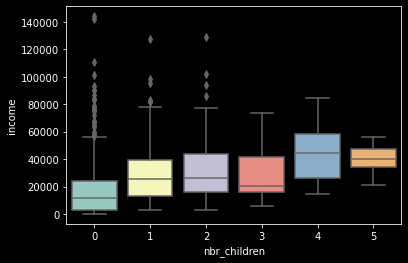

In [14]:
sns.boxplot(x=customers.nbr_children, y=customers.income)

In [15]:
kids = customers.nbr_children.apply(lambda x: 1 if (x >= 1) else 0)

<AxesSubplot:xlabel='nbr_children', ylabel='income'>

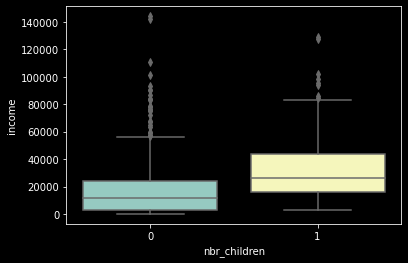

In [16]:
sns.boxplot(x=kids, y=customers.income)

In [17]:
customers['has_children'] = kids

<AxesSubplot:xlabel='marital_status', ylabel='income'>

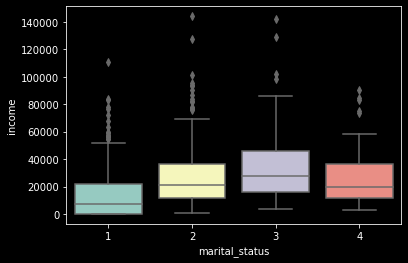

In [18]:
sns.boxplot(x=customers.marital_status, y=customers.income)

<AxesSubplot:xlabel='gender', ylabel='income'>

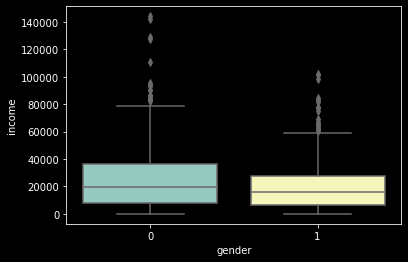

In [19]:
sns.boxplot(x=customers.gender, y=customers.income)

1 = single
2 = married
3/4 widowed/divorced?

In [20]:
# customers['postal_code'].apply(lambda x: x // 100).nunique() # This won't work

In [21]:
customers.name_prefix.unique()

array(['        ', 'Mr.     ', 'Ms.     ', 'Mrs.    ', 'Dr.     ',
       'Miss    '], dtype=object)

In [22]:
customers.describe()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,street_nbr,postal_code,has_children
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,0.559572,1.882195,8523.109772,59502.690763,0.376171
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051,5219.488263,31205.926508,0.484748
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000,196.000000,2149.000000,0.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,0.000000,1.000000,4295.500000,33145.000000,0.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,1.000000,2.000000,8001.000000,64132.000000,0.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,1.000000,2.000000,12039.000000,90082.000000,1.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,1.000000,4.000000,19940.000000,98186.000000,1.000000


            cust_id         income         age  years_with_bank  nbr_children  \
count  7.470000e+02     747.000000  747.000000       747.000000    747.000000   
mean   1.362991e+06   22728.281124   42.479250         3.907631      0.714859   
std    2.925255e+02   22207.221405   19.114879         2.675634      1.103410   
min    1.362480e+06       0.000000   13.000000         0.000000      0.000000   
25%    1.362732e+06    7118.500000   28.000000         2.000000      0.000000   
50%    1.362993e+06   17242.000000   42.000000         4.000000      0.000000   
75%    1.363244e+06   31338.000000   56.000000         6.000000      1.000000   
max    1.363495e+06  144157.000000   89.000000         9.000000      5.000000   

           gender  marital_status    street_nbr   postal_code  has_children  
count  747.000000      747.000000    747.000000    747.000000    747.000000  
mean     0.559572        1.882195   8523.109772  59502.690763      0.376171  
std      0.496771        0.892051   

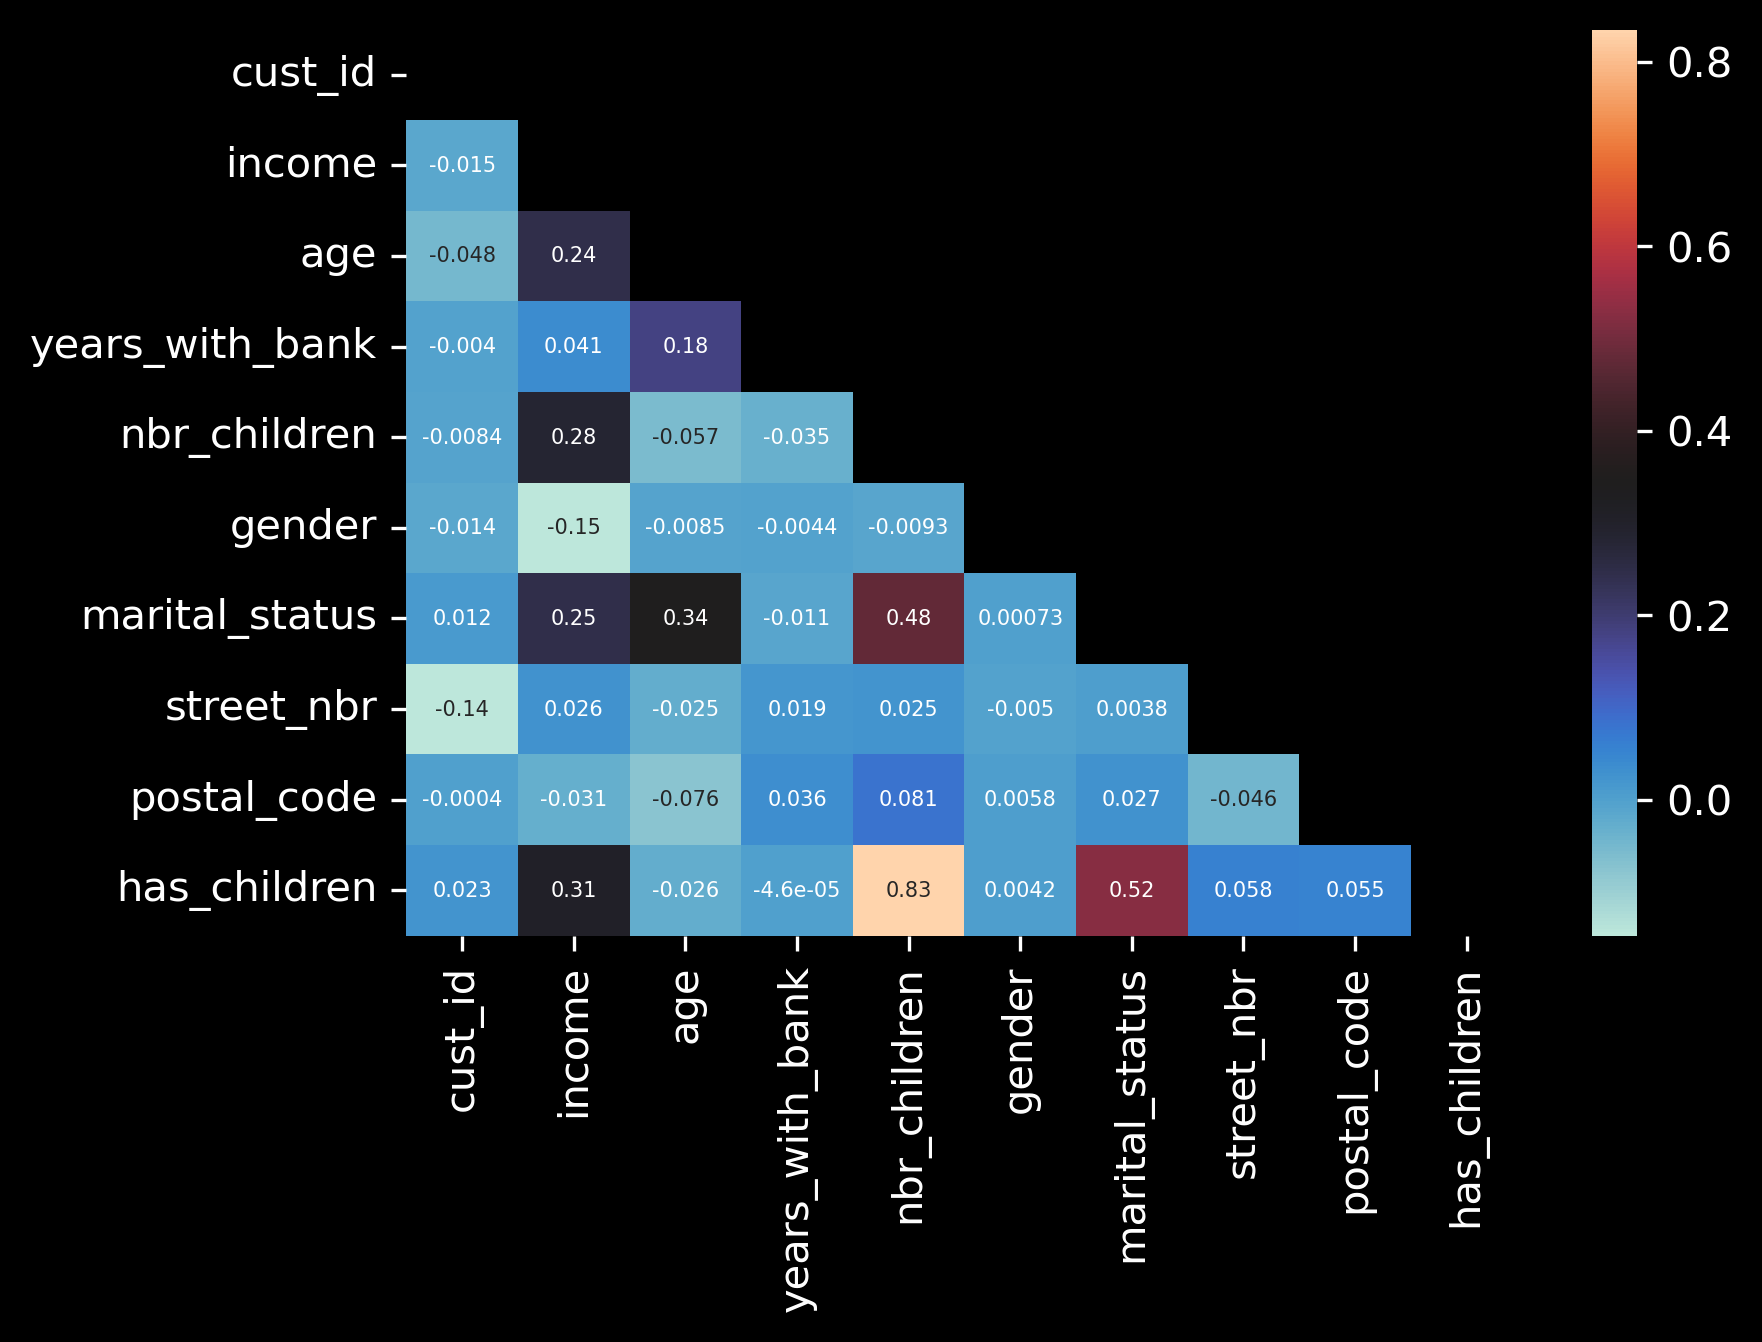

In [23]:
numeric_mulitvariate(customers)

In [24]:
pd.get_dummies(customers.state_code)

,AL,AZ,CA,CO,DC,FL,GA,HI,IL,IN,...,NY,OH,OK,OR,PA,TN,TX,VA,WA,WI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
customers = customers.drop(columns=['name_prefix', 'first_name', 'last_name', 'postal_code', 'city_name', 'state_code', 'nbr_children', 'street_name', 'street_nbr'])
customers.head()

,cust_id,income,age,years_with_bank,gender,marital_status,region,has_children
0,1362691,26150,46,5,0,2,W,1
1,1362487,6605,71,1,0,2,W,0
2,1363160,18548,38,8,1,1,W,0
3,1362752,47668,54,3,1,1,W,0
4,1362548,44554,59,9,1,4,NE,1


<AxesSubplot:xlabel='region', ylabel='income'>

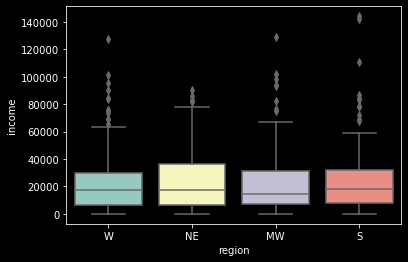

In [26]:
sns.boxplot(x=customers.region, y=customers.income)

In [27]:
regions = pd.get_dummies(customers['region'], drop_first=True)

In [28]:
type(regions)

pandas.core.frame.DataFrame

In [29]:
regions.head()

,NE,S,W
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [30]:
regions.columns

Index(['NE', 'S', 'W'], dtype='object')

In [31]:
regions

,NE,S,W
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
742,0,0,1
743,1,0,0
744,0,0,1
745,0,1,0


In [32]:
customers[regions.columns] = regions

In [33]:
customers = customers.drop(columns=['region'])

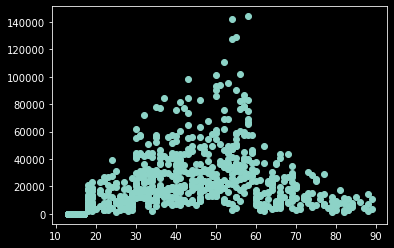

In [34]:
plt.scatter(x=customers.age, y=customers.income)

In [35]:
# All ages < 18 have no income
customers[customers['income'] == 0]['age'].value_counts()

15    32
17    21
16    19
13    15
14    15
Name: age, dtype: int64

In [36]:
test = customers.copy()

In [37]:
test['income'].describe()

count       747.000000
mean      22728.281124
std       22207.221405
min           0.000000
25%        7118.500000
50%       17242.000000
75%       31338.000000
max      144157.000000
Name: income, dtype: float64

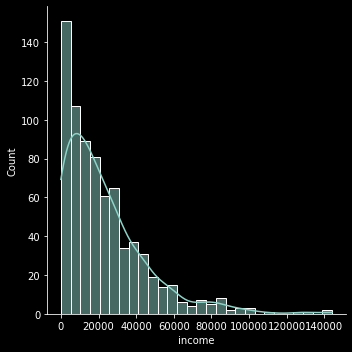

In [38]:
sns.displot(customers['income'], kde=True)

M:\Anaconda\envs\LHL\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


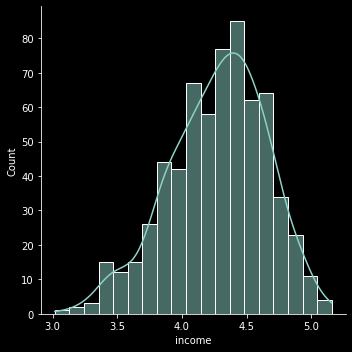

In [39]:
sns.displot(np.log10(customers['income']), kde=True)

In [40]:
# customers['income'] = customers['income'].apply(lambda x: customers['income'].median() if (x == 0) else x)

In [41]:
customers['log10_income'] = np.log10(customers.income)

M:\Anaconda\envs\LHL\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
customers['log10_income'].value_counts()

-inf         102
 4.098990      2
 3.905148      2
 4.081779      2
 4.386820      2
            ... 
 4.559152      1
 4.695683      1
 5.111249      1
 4.598823      1
 4.252246      1
Name: log10_income, Length: 640, dtype: int64

In [43]:
customers.loc[np.isneginf(customers['log10_income']), 'log10_income'] = 0

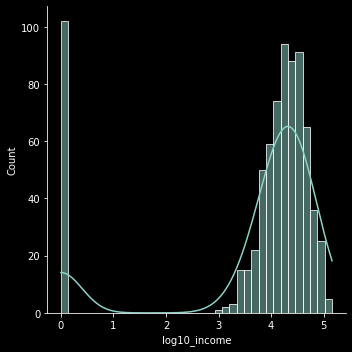

In [44]:
sns.displot(customers['log10_income'], kde=True)

In [45]:
customers[customers.income == 0].income.value_counts() / customers.shape[0]

0    0.136546
Name: income, dtype: float64

In [46]:
customers.head()

,cust_id,income,age,years_with_bank,gender,marital_status,has_children,NE,S,W,log10_income
0,1362691,26150,46,5,0,2,1,0,0,1,4.417472
1,1362487,6605,71,1,0,2,0,0,0,1,3.819873
2,1363160,18548,38,8,1,1,0,0,0,1,4.268297
3,1362752,47668,54,3,1,1,0,0,0,1,4.678227
4,1362548,44554,59,9,1,4,1,1,0,0,4.648887


In [47]:
customers.age.describe()

count    747.000000
mean      42.479250
std       19.114879
min       13.000000
25%       28.000000
50%       42.000000
75%       56.000000
max       89.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

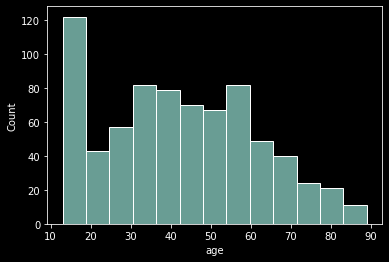

In [48]:
sns.histplot(customers.age)

In [49]:
customers.head()

,cust_id,income,age,years_with_bank,gender,marital_status,has_children,NE,S,W,log10_income
0,1362691,26150,46,5,0,2,1,0,0,1,4.417472
1,1362487,6605,71,1,0,2,0,0,0,1,3.819873
2,1363160,18548,38,8,1,1,0,0,0,1,4.268297
3,1362752,47668,54,3,1,1,0,0,0,1,4.678227
4,1362548,44554,59,9,1,4,1,1,0,0,4.648887


ages  
13-17  
18-25  
25-30 NOTE  
30-40  
40-50  
50-60  
60-75  
75+  

In [50]:
model_customers = customers.drop(columns=['cust_id', 'income'])

In [51]:
std_scalar = StandardScaler()
scaled_customers = std_scalar.fit_transform(model_customers)

In [52]:
std_customers = pd.DataFrame(scaled_customers, columns=model_customers.columns)

In [53]:
std_customers.head()

,age,years_with_bank,gender,marital_status,has_children,NE,S,W,log10_income
0,0.184312,0.408539,-1.127172,0.132149,1.287774,-0.49707,-0.569621,1.298865,0.480869
1,1.493070,-1.087435,-1.127172,0.132149,-0.776534,-0.49707,-0.569621,1.298865,0.084871
2,-0.234490,1.530520,0.887176,-0.989614,-0.776534,-0.49707,-0.569621,1.298865,0.382019
3,0.603115,-0.339448,0.887176,-0.989614,-0.776534,-0.49707,-0.569621,1.298865,0.653658
4,0.864867,1.904514,0.887176,2.375675,1.287774,2.01179,-0.569621,-0.769903,0.634216


In [54]:
test_std = std_customers.drop(columns=['NE', 'S', 'W'])

In [55]:
# Testing without location data.
test_std.head()

,age,years_with_bank,gender,marital_status,has_children,log10_income
0,0.184312,0.408539,-1.127172,0.132149,1.287774,0.480869
1,1.493070,-1.087435,-1.127172,0.132149,-0.776534,0.084871
2,-0.234490,1.530520,0.887176,-0.989614,-0.776534,0.382019
3,0.603115,-0.339448,0.887176,-0.989614,-0.776534,0.653658
4,0.864867,1.904514,0.887176,2.375675,1.287774,0.634216


#### PCA

In [56]:
pca_transform = PCA(n_components=2)
pca_customers = pca_transform.fit_transform(std_customers)

In [57]:
pca_transform = PCA(n_components=2)
pca_test = pca_transform.fit_transform(test_std)

In [58]:
pca_df = pd.DataFrame(pca_customers, columns=['PC1', 'PC2'])

In [59]:
pca_df.head()

,PC1,PC2
0,-0.930167,1.564939
1,-0.281963,0.928793
2,0.713647,1.256891
3,0.368180,1.078769
4,-2.748180,-0.403450


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

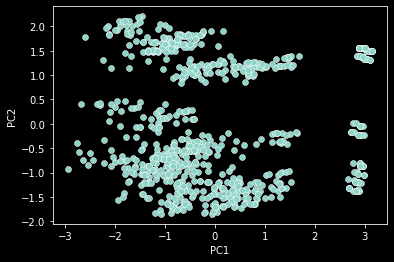

In [60]:
sns.scatterplot(x=pca_df.PC1, y=pca_df.PC2)

<AxesSubplot:>

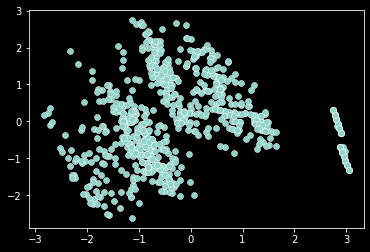

In [63]:
sns.scatterplot(x=pca_test[:, 0], y=pca_test[:, 1])

#### Clustering

##### k-means

In [ ]:
# Elbow rule suggests 3 clusters.

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_distortion(pca_customers, max_clusters=10)

In [ ]:
kmeans = KMeans(n_clusters=3,
                n_init=50)

In [ ]:
y_kmeans = kmeans.fit_predict(pca_customers)

In [ ]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend(loc=(1.01, 0.7))
    plt.show()

plot_clusters(pca_customers, y_kmeans)

##### DBSCAN

In [ ]:
cust_db = DBSCAN() # default params to start with

In [ ]:
y_db = cust_db.fit_predict(pca_customers)

In [ ]:
plot_clusters(pca_customers, y_db)

#### Poly exp on income and age

In [ ]:
plt.scatter(x=customers.age, y=customers.income)

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
poly_income_age = poly.fit_transform(customers[['income', 'age']])

In [ ]:
poly_income_age = pd.DataFrame(poly_income_age)

In [ ]:
poly_income_age

### Accounts

In [ ]:
accounts.info()
# only end date has nulls, could add a category for closed/active = 0/1

In [ ]:
accounts.head()

In [ ]:
accounts['acct_type'].unique()

### Transactions

In [ ]:
transactions.info()

In [ ]:
transactions.head(20)

In [ ]:
transactions[transactions['tran_id'] == 123] # transcriptional error?